In [1]:
from ESPN_Manager.Manager import Manager
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import random
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

l19 = Manager(577577, 'djslocum13@gmail.com', 'aspen1983')

In [2]:
def manager_load_player_data(player, week):
    if player.position == "WR":
        return {
            "week": week,
            "name": player.name,
            "projected_points": player.projected_points,
            "actual_points": player.points,
            "point_diff": player.points - player.projected_points,
            "pro_team": player.proTeam,
            "position": player.position,
            "position_rank": player.posRank,
            "weekly_outlook": player.weeklyOutlook,
            "receptions": player.stats["receptions"],
            "rec_yards": player.stats["rec_yards"],
            "rec_tds": player.stats["rec_tds"],
            "rec_2pt_conversion": player.stats["rec_2pt_conversion"],
            "targets": player.stats["targets"],
            "rec_avg_yards": player.stats["rec_avg_yards"],
            "fumbles": player.stats["fumbles"],
            "receptions_proj": player.stats_projections["receptions"],
            "rec_yards_proj": player.stats_projections["rec_yards"],
            "rec_tds_proj": player.stats_projections["rec_tds"],
            "rec_2pt_conversion_proj": player.stats_projections["rec_2pt_conversion"],
            "targets_proj": player.stats_projections["targets"],
            "rec_avg_yards_proj": player.stats_projections["rec_avg_yards"],
            "fumbles_proj": player.stats_projections["fumbles"],
        }
    else:
        return {
            "week": week,
            "name": player.name,
            "projected_points": player.projected_points,
            "actual_points": player.points,
            "point_diff": player.points - player.projected_points,
            "pro_team": player.proTeam,
            "position": player.position,
            "position_rank": player.posRank,
            "weekly_outlook": player.weeklyOutlook,
        }      

box_score_data = []
box_score_data_pd = pd.DataFrame([])
for week in range(1, l19.current_week):
    try:
        data_pd = pd.read_csv("data/player_data_week_{}.csv".format(week))
        box_score_data_pd.append(data_pd)
    except:
        players = l19.get_box_player(week)
        week_data = []
        for p in players:
            d = manager_load_player_data(p, week)
            box_score_data.append(d)
            week_data.append(d)
        week_data = pd.DataFrame(week_data)
        week_data.to_csv("data/player_data_week_{}.csv".format(week), index=False)
        print("\nWeek {} data saved".format(week))
        time.sleep(random.random()*3)


Loading Week 8
# of Players Loaded: 100 200 300 400 500 600 700 800 900 
Week 8 data saved

Loading Week 9
# of Players Loaded: 100 200 300 400 500 600 700 800 900 
Week 9 data saved

Loading Week 10
# of Players Loaded: 100 200 300 400 500 600 700 800 900 
Week 10 data saved

Loading Week 11
# of Players Loaded: 100 200 300 400 500 600 700 800 900 
Week 11 data saved

Loading Week 12
# of Players Loaded: 100 200 300 400 500 600 700 800 900 
Week 12 data saved

Loading Week 13
# of Players Loaded: 100 200 300 400 500 600 700 800 900 
Week 13 data saved


In [27]:
pd.options.display.max_rows = 1000

In [26]:
box_score_data_pd = pd.DataFrame([])
for week in range(1, l19.current_week):
    data_pd = pd.read_csv("data/player_data_week_{}.csv".format(week))
    box_score_data_pd = box_score_data_pd.append(data_pd)

box_score_data_pd = box_score_data_pd.reset_index().drop(['index'], axis=1)
box_score_data_pd

actual_points  fumbles  fumbles_proj             name  point_diff  \
0              22.0      0.0      0.045436   Michael Thomas        3.66   
1              13.0      NaN           NaN  Ezekiel Elliott       -7.59   
2              15.0      0.0      0.041613      Julio Jones       -1.36   
3              31.0      0.0      0.046875  DeAndre Hopkins       11.70   
4              25.0      NaN           NaN      Dalvin Cook        9.34   
...             ...      ...           ...              ...         ...   
9708            0.0      0.0      0.000000     Mose Frazier        0.00   
9709            0.0      0.0      0.000000       Jeff Smith        0.00   
9710            0.0      0.0      0.000000    Cyril Grayson        0.00   
9711            0.0      0.0      0.000000  Spencer Schnell        0.00   
9712            0.0      NaN           NaN    Codey McElroy        0.00   

     position position_rank pro_team  projected_points  rec_2pt_conversion  \
0          WR             1       NO             18.34                 0.0   
1          RB             5      DAL             20.59                 NaN   
2          WR             6      ATL             16.36                 0.0   
3          WR             7      HOU             19.30                 0.0   
4          RB             2      MIN             15.66                 NaN   
...       ...           ...      ...               ...                 ...   
9708       WR             0      CAR              0.00                 0.0   
9709       WR           199      NYJ              0.00                 0.0   
9710       WR            []       TB              0.00                 0.0   
9711       WR            []       TB              0.00                 0.0   
9712       TE            []       TB              0.00                 NaN   

      ...  rec_tds  rec_tds_proj  rec_yards  rec_yards_proj  receptions  \
0     ...      0.0      0.550059      123.0       81.768047        10.0   
1     ...      NaN           NaN        NaN             NaN         NaN   
2     ...      1.0      0.416376       31.0       84.269820         6.0   
3     ...      2.0      0.573274      111.0       94.089544         8.0   
4     ...      NaN           NaN        NaN             NaN         NaN   
...   ...      ...           ...        ...             ...         ...   
9708  ...      0.0      0.000000        0.0        0.000000         0.0   
9709  ...      0.0      0.000000        0.0        0.000000         0.0   
9710  ...      0.0      0.000000        0.0        0.000000         0.0   
9711  ...      0.0      0.000000        0.0        0.000000         0.0   
9712  ...      NaN           NaN        NaN             NaN         NaN   

      receptions_proj  targets  targets_proj  week  \
0            7.066950     13.0      9.096609     1   
1                 NaN      NaN           NaN     1   
2            5.892019     11.0      9.135325     1   
3            6.909984     13.0     10.515186     1   
4                 NaN      NaN           NaN     1   
...               ...      ...           ...   ...   
9708         0.000000      0.0      0.000000    13   
9709         0.000000      0.0      0.000000    13   
9710         0.000000      0.0      0.000000    13   
9711         0.000000      0.0      0.000000    13   
9712              NaN      NaN           NaN    13   

                                         weekly_outlook  
0     Thomas has been in the NFL for three seasons a...  
1     An absolute workhorse since entering the NFL i...  
2     Say what you want about Jones' occasional touc...  
3     Hopkins has been the No. 2 scoring fantasy wid...  
4     Now two seasons into his NFL career, Cook has ...  
...                                                 ...  
9708                                                NaN  
9709                                                NaN  
9710                                                NaN  
9711                                  

In [32]:
box_score_data_pd.groupby(['name', 'position']).agg({'projected_points': 'sum', 'actual_points': 'sum', 'point_diff': 'sum'}).sort_values('point_diff', ascending=False).loc[lambda df: df.projected_points >= 75]

projected_points  actual_points  point_diff
name                     position                                             
Patriots D/ST            DST                  91.50          191.0       99.50
49ers D/ST               DST                  81.13          160.0       78.87
Lamar Jackson            QB                  244.68          316.0       71.32
Christian McCaffrey      RB                  283.60          343.0       59.40
Steelers D/ST            DST                  80.59          139.0       58.41
Chris Godwin             WR                  181.54          239.0       57.46
DeVante Parker           WR                  114.54          168.0       53.46
Austin Ekeler            RB                  169.41          222.0       52.59
Austin Hooper            TE                  102.61          150.0       47.39
Marvin Jones Jr.         WR                  135.81          182.0       46.19
John Brown               WR                  133.50          178.0       44.50
DJ Chark Jr.             WR                  149.22          192.0       42.78
Jarvis Landry            WR                  140.89          182.0       41.11
Ryan Tannehill           QB                   83.95          125.0       41.05
Deebo Samuel             WR                   82.82          122.0       39.18
DJ Moore                 WR                  153.58          191.0       37.42
Courtland Sutton         WR                  140.97          178.0       37.03
Cole Beasley             WR                  108.99          146.0       37.01
Kirk Cousins             QB                  166.31          203.0       36.69
Gardner Minshew II       QB                  113.02          148.0       34.98
Derrick Henry            RB                  177.22          211.0       33.78
Darius Slayton           WR                   81.22          114.0       32.78
Dak Prescott             QB                  217.82          250.0       32.18
Matthew Stafford         QB                  128.40          160.0       31.60
Aaron Jones              RB                  181.06          212.0       30.94
Russell Wilson           QB                  228.23          258.0       29.77
Jamaal Williams          RB                   94.42          124.0       29.58
Michael Gallup           WR                  112.18          141.0       28.82
Ryan Fitzpatrick         QB                  112.73          141.0       28.27
Allen Robinson II        WR                  153.34          181.0       27.66
Michael Thomas           WR                  242.40          270.0       27.60
Amari Cooper             WR                  169.84          197.0       27.16
Saints D/ST              DST                  79.48          106.0       26.52
Jordan Howard            RB                   77.62          104.0       26.38
Kenny Golladay           WR                  162.78          189.0       26.22
Mike Evans               WR                  188.86          215.0       26.14
Dalvin Cook              RB                  233.06          259.0       25.94
Calvin Ridley            WR                  146.46          172.0       25.54
Cooper Kupp              WR                  175.18          200.0       24.82
Wil Lutz                 K                    97.28          121.0       23.72
Marquise Brown           WR                   96.65          120.0       23.35
James Washington         WR                   76.94          100.0       23.06
Mark Ingram II           RB                  158.31          181.0       22.69
Deshaun Watson           QB                  235.37          258.0       22.63
A.J. Brown               WR                   93.61          116.0       22.39
Julian Edelman           WR                  181.84          204.0       22.16
Robert Woods             WR                  131.55          153.0       21.45
Harrison Butker          K                   100.27          121.0       20.73
Sam Darnold              QB                  111.47          131.0       19.53
Golden

In [94]:
data = data[data.projected_points > 0.25]
position = "WR"
box_score_data = pd.DataFrame(box_score_data)
data = box_score_data.copy()
data = data[data.position == position]
data.position = data.position.astype("category")
data = data[data.position_rank.isnull() == False]
onehot = pd.get_dummies(data.position)
data_unsupervised = data.drop(['actual_points', 'point_diff',
                               'pro_team','weekly_outlook','week',
                               'name','position', "receptions", 
                               "rec_yards","rec_tds","rec_2pt_conversion",
                               "targets","rec_avg_yards","fumbles"
                              ], axis=1)
#data_unsupervised.dtypes
#data_unsupervised = pd.concat([data_unsupervised, onehot], axis=1)
data_unsupervised = data_unsupervised.astype("float64")

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_unsupervised_scaled = scaler.fit_transform(data_unsupervised)
data_unsupervised_scaled = pd.DataFrame(data_unsupervised_scaled, columns=data_unsupervised.columns)
data_unsupervised_scaled

fumbles_proj  position_rank  projected_points  rec_2pt_conversion_proj  \
0         2.920706      -1.275910          2.906340                 3.319707   
1         2.609032      -1.198149          2.506845                 1.803387   
2         3.038039      -1.182597          3.100035                 2.020391   
3         0.975306      -0.202808          2.389822                 1.256032   
4         2.559360      -1.182597          2.325257                 1.943046   
5         1.237642      -0.498300          2.522987                 2.381096   
6         1.308255      -0.856001          2.379733                 3.769059   
7         3.573815      -1.229254          2.064980                 2.421033   
8         2.308932      -1.104836          2.069015                 2.057660   
9         1.283377      -1.244806          1.558549                 1.645285   
10        2.105234      -1.135940          2.375698                 0.568169   
11        1.987368      -0.669374          2.720716                 2.234426   
12        2.201192      -1.058179          2.391839                 1.987649   
13        1.178145      -0.964866          1.615044                 0.859136   
14        1.735220      -0.902657          1.849091                 1.924712   
15        2.523541      -1.260358          1.574691                 1.741706   
16        1.089215      -1.151493          1.550479                 1.653034   
17        1.082601      -1.089284          1.863215                 2.128302   
18        1.295673      -0.933762          1.742156                 1.097452   
19        1.386674      -0.809344          2.008486                 1.355582   
20        1.114922      -0.809344          1.615044                 3.925557   
21        0.986622      -1.011523          2.032697                 1.096452   
22        2.111880      -0.933762          1.463720                 1.326574   
23        1.271832      -1.089284          1.782509                 2.030715   
24        0.928723      -0.964866          1.268008                 1.702569   
25        0.751676      -1.213701          0.961325                 1.030574   
26        3.486157      -0.887105          1.661450                 1.119198   
27        0.275406      -1.011523          0.971413                 0.517690   
28        2.006551      -0.824896          1.320467                 0.511246   
29        1.457654      -0.700479          1.475826                 1.884814   
...            ...            ...               ...                      ...   
1699     -0.783580       1.476830         -0.794031                -0.770726   
1700     -0.783580       1.212442         -0.771837                -0.770726   
1701     -0.783580      -0.856001         -0.794031                -0.770726   
1702     -0.783580      -0.669374         -0.794031                -0.770726   
1703     -0.783580      -1.058179         -0.794031                -0.770726   
1704     -0.783580      -1.260358         -0.794031                -0.770726   
1705     -0.783580      -0.887105         -0.794031                -0.770726   
1706     -0.783580      -0.700479         -0.794031                -0.770726   
1707     -0.783580      -0.762688         -0.794031                -0.770726   
1708     -0.783580       0.248206         -0.794031                -0.770726   
1709     -0.783580       0.994711         -0.794031                -0.770726   
1710     -0.783580      -0.327226         -0.794031                -0.770726   
1711     -0.783580       0.901398         -0.794031                -0.770726   
1712     -0.783580       1.103577         -0.794031                -0.770726   
1713     -0.783580       0.745876         -0.794031                -0.770726   
1714     -0.783580       0.994711         -0.794031                -0.770726   
1715     -0.783580       1.103577         -0.794031                -0.770726   
1716     -0.783580       0.248206         -0.794031                -0.770726   
1717  

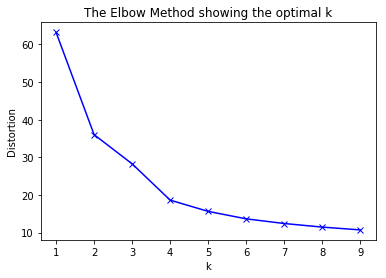

In [95]:
# clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data_unsupervised)
    kmeanModel.fit(data_unsupervised)
    distortions.append(sum(np.min(cdist(data_unsupervised, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data_unsupervised.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [96]:
clf = KMeans(n_clusters=6, n_jobs=-1, random_state=13).fit(data_unsupervised)
pred = clf.labels_
data['cluster'] = pred
data.sample(5)

actual_points  fumbles  fumbles_proj              name  point_diff  \
3760           14.0      0.0      0.022467        Auden Tate        4.49   
4399           12.0      0.0      0.015222        A.J. Brown        5.21   
3142            8.0      0.0      0.017070  Demaryius Thomas        1.79   
2322            9.0      0.0      0.020697        Auden Tate        0.24   
3619           17.0      0.0      0.032428      Adam Thielen        4.09   

     position  position_rank pro_team  projected_points  rec_2pt_conversion  \
3760       WR             54      CIN              9.51                 0.0   
4399       WR             45      TEN              6.79                 0.0   
3142       WR             89      NYJ              6.21                 0.0   
2322       WR             54      CIN              8.76                 0.0   
3619       WR             12      MIN             12.91                 0.0   

       ...     rec_tds_proj  rec_yards  rec_yards_proj  receptions  \
3760   ...         0.282305       91.0       49.295550         5.0   
4399   ...         0.200196       64.0       37.759496         6.0   
3142   ...         0.103651       47.0       31.171959         4.0   
2322   ...         0.209015       50.0       45.758938         4.0   
3619   ...         0.352249       57.0       67.152801         6.0   

      receptions_proj  targets  targets_proj  week  \
3760         3.831871     11.0      6.430987     6   
4399         2.596164      8.0      4.201374     7   
3142         2.610487      9.0      4.329435     5   
2322         3.529978      6.0      5.826516     4   
3619         4.741646      8.0      7.146643     6   

                                         weekly_outlook  cluster  
3760                                                           1  
4399  The Titans continued their wide receiver overh...        1  
3142  Thomas signed with the Patriots, which breathe...        3  
2322                                                           1  
3619  Thielen did it again. For the fourth consecuti...        4  

[5 rows x 24 columns]

WR


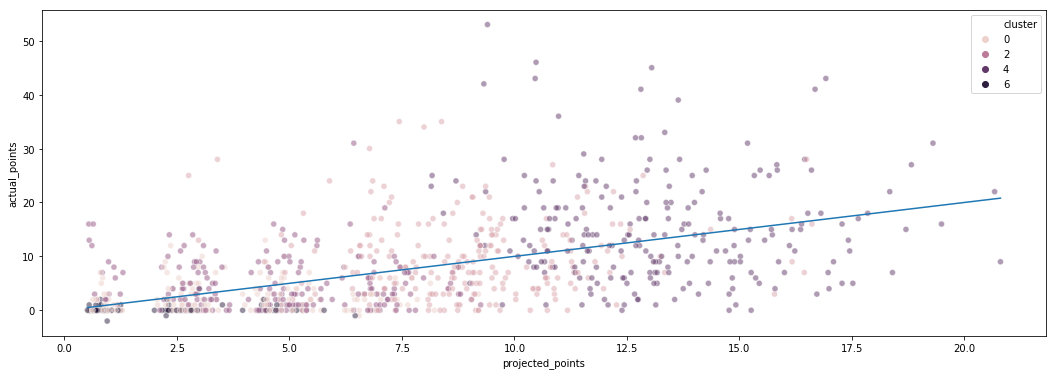

In [97]:
data.position_rank = pd.to_numeric(data.position_rank)
data = data[data.position != "Other"]
cmap = sns.cubehelix_palette(as_cmap=True)

#sns.scatterplot(data=data, x="projected_points", y="actual_points", hue="position")
#sns.relplot(data=data, x="projected_points", y="actual_points", row="position", alpha=.5)
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

for position in data.position.unique():
    print(position)
    fig, ax = plt.subplots(figsize=(18, 6))
    #ax.set(xscale="log", yscale="log")
    if position == "QB":
        less = 5
    else:
        less = 0.5
    plot = data[(data.position == position)&(data.projected_points > less)&(data.position_rank > 0)]
    sns.scatterplot(data=plot, x="projected_points", y="actual_points", hue="cluster", alpha=0.5)
    #scatter = plt.scatter(data=plot, x="projected_points", y="actual_points", c="position_rank", cmap="seismic", alpha=0.75)
    #fig.colorbar(scatter)
    x = np.linspace(min(plot.projected_points),max(plot.projected_points))
    y = x
    plt.plot(x, y)
    plt.show()

WR


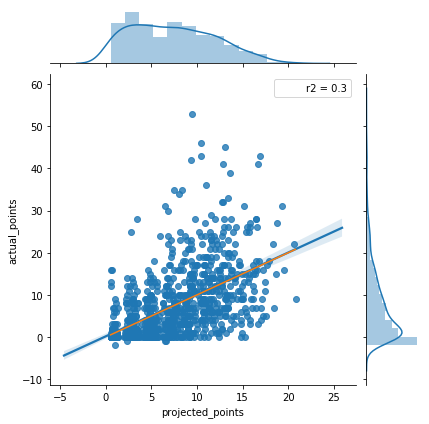

In [98]:
for position in data.position.unique():
    print(position)
    if position == "QB":
        less = 5
    else:
        less = 0.5
    plot = data[(data.position == position)&(data.projected_points > less)&(data.position_rank > 0)]
    sns.jointplot(data=plot, x="projected_points", y="actual_points", kind="reg", stat_func=r2)
    x = np.linspace(min(plot.projected_points),max(plot.projected_points))
    y = x
    plt.plot(x, y)
    plt.show()

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data = data.reset_index()

In [100]:
y = data.actual_points
X = data.drop(['actual_points','projected_points','point_diff','pro_team','weekly_outlook',
               'name', 'week','position',"receptions","rec_yards","rec_tds",
               "rec_2pt_conversion","targets","rec_avg_yards","fumbles"], 
              axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)
X['projected_points'] = data['projected_points']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
clf = LinearRegression().fit(X_train,y_train)
pred = clf.predict(X_test)

In [102]:
# The mean squared error
print("Mean squared error old: %.2f" % mean_squared_error(y_test, X_test.projected_points))
print("Mean squared error new: %.2f" % mean_squared_error(y_test, pred))

# Explained variance score: 1 is perfect prediction
print('Variance score old: %.2f' % r2_score(y_test, X_test.projected_points))
print('Variance score new: %.2f' % r2_score(y_test, pred))

Mean squared error old: 29.42
Mean squared error new: 28.63
Variance score old: 0.47
Variance score new: 0.49


1384.38916128
1246.51


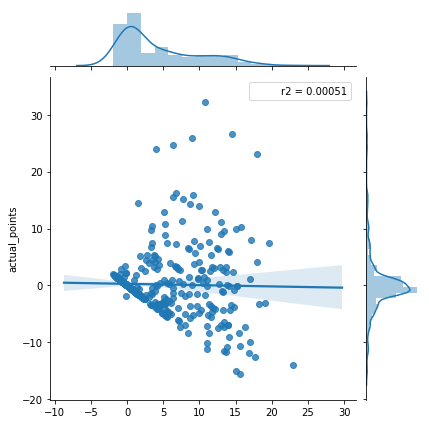

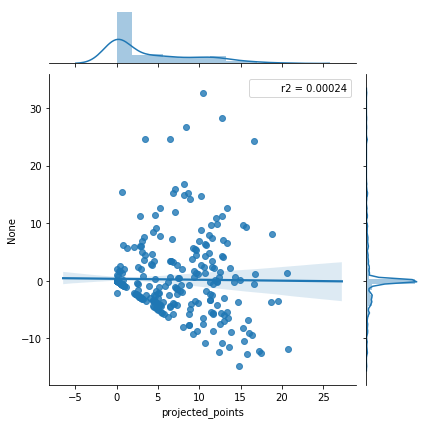

In [104]:
diff = y_test - pred
print(sum(abs(diff)))
sns.jointplot(y=diff, x=pred, label="new", kind="reg", stat_func=r2)

diff = y_test - X_test.projected_points
print(sum(abs(diff)))
sns.jointplot(y=diff, x=X_test.projected_points, label="old" , kind="reg", stat_func=r2)

plt.show()

In [22]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot
from ESPN_Manager.Manager import Manager
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import random
from scipy import stats
import warnings

jtplot.style()
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
sns.set_style("whitegrid")

In [24]:
def get_year_stats(year):
    l = Manager(577577, 'djslocum13@gmail.com', 'aspen1983', year)
    player_data = l.manager_get_rostered_player_data()

    bench_data = player_data.loc[lambda df: df.current_slot == "BE"]
    start_data = player_data.loc[lambda df: df.current_slot != "BE"]

    weekly_start_data = start_data.groupby(['ff_team','week']).agg({"projected_points": 'sum',"actual_points": 'sum', "point_diff": 'sum'}).reset_index()
    year_vals = weekly_start_data.groupby('ff_team').agg({"projected_points": "mean","actual_points": "mean", "point_diff": "sum"})
    order = year_vals.sort_values('actual_points').index

    weekly_start_data_1 = weekly_start_data[['ff_team','projected_points']]
    weekly_start_data_1.columns = ['ff_team','points']
    weekly_start_data_1['type'] = 'projected'
    weekly_start_data_2 = weekly_start_data[['ff_team','actual_points']]
    weekly_start_data_2.columns = ['ff_team','points']
    weekly_start_data_2['type'] = 'actual'
    weekly_start_data_3 = weekly_start_data_1.append(weekly_start_data_2)
    
    plt.subplots(figsize=(14, 14))
    ax = sns.boxplot("ff_team", "points", data=weekly_start_data_3, order=order, hue="type")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

    return player_data, year_vals, weekly_start_data_3

[Text(0, 0, 'Hunter Biggs'),
 Text(0, 0, 'ZACK TOWNSEND'),
 Text(0, 0, 'B Murph'),
 Text(0, 0, 'Nathan Weiner'),
 Text(0, 0, 'mac steffen'),
 Text(0, 0, 'Danny Slocum'),
 Text(0, 0, 'Vinay Gupta'),
 Text(0, 0, 'Bryan Kong')]

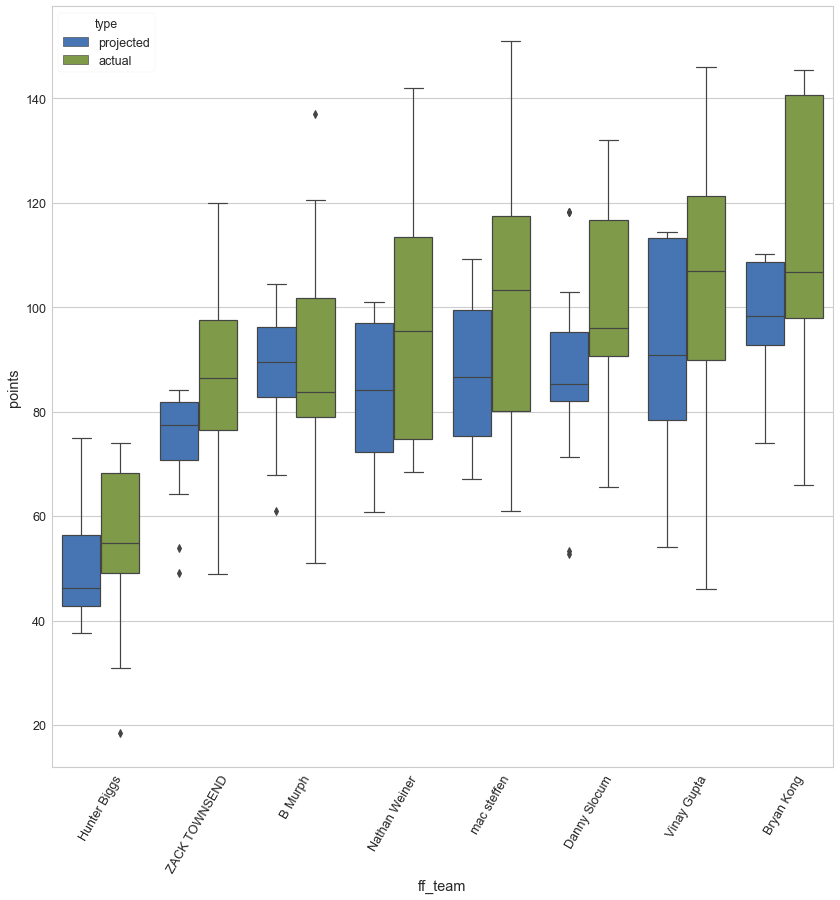

In [7]:
x,y,z = get_year_stats(2019)

In [35]:
pos_rank_data = player_data[['name','actual_points','point_diff',
                      'position','ff_team','week']]

In [36]:
avg_player_data = pos_rank_data.groupby(['name','position','ff_team']).mean().reset_index()

DST


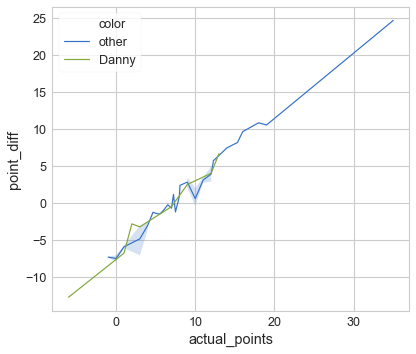

WR


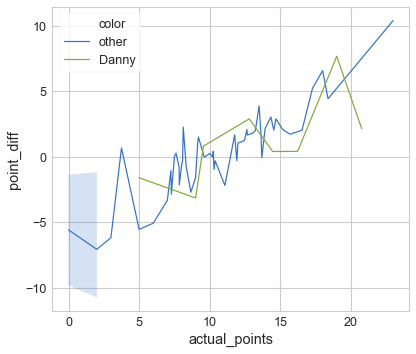

RB


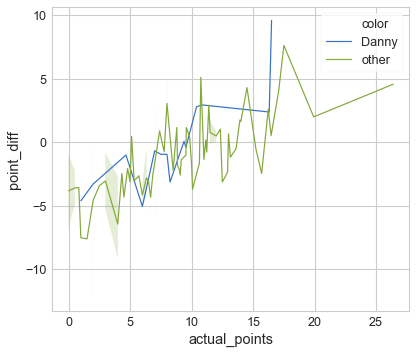

QB


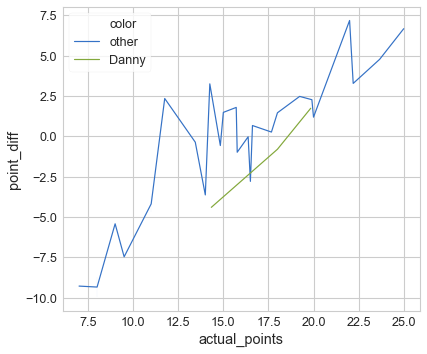

TE


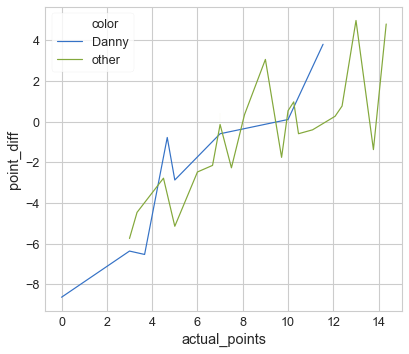

K


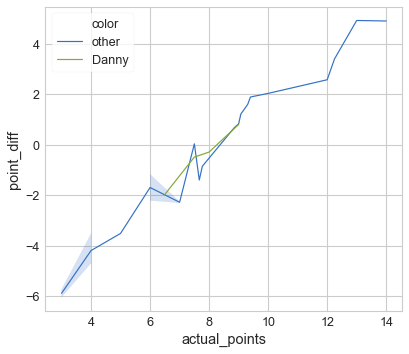

In [37]:
avg_player_data.sort_values(['actual_points','point_diff'])
avg_player_data['color'] = "other"
avg_player_data['color'][avg_player_data.ff_team == 'Danny Slocum'] = "Danny"
for position in avg_player_data.position.unique():
    print(position)
    plot = avg_player_data[avg_player_data.position == position]
    sns.lineplot(data=plot, x="actual_points", y="point_diff", hue="color")
    plt.show()

# Overall Team Performance 

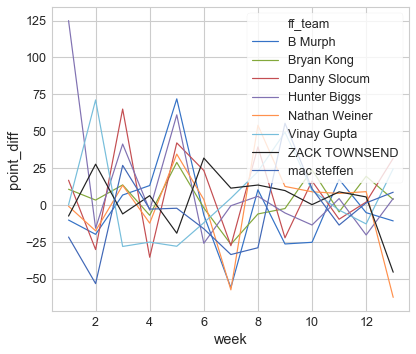

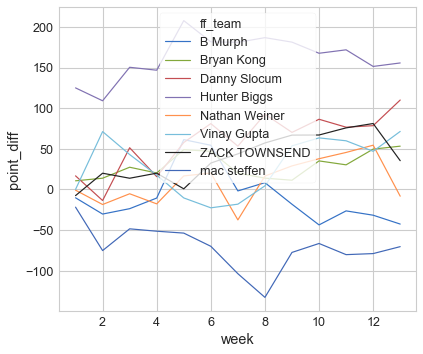

In [38]:
performance_data = player_data[['point_diff', 'current_slot', 'ff_team','name', 'week']]
performance_sum = performance_data.groupby(['ff_team', 'week']).sum().reset_index()
performance_cumsum = performance_data.groupby(['ff_team', 'week']).sum().groupby("ff_team").cumsum().reset_index()

sns.lineplot(data=performance_sum, x="week", y="point_diff", hue="ff_team")
plt.show()
sns.lineplot(data=performance_cumsum, x="week", y="point_diff", hue="ff_team")
plt.show()

# Starter Team Performance 

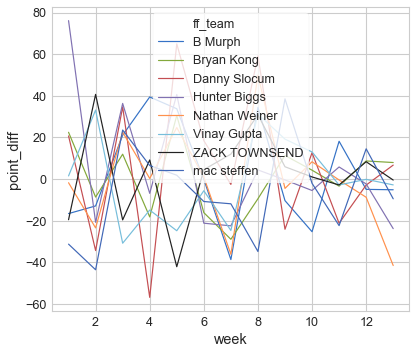

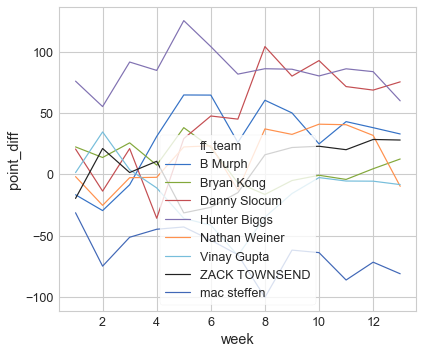

In [39]:
performance_data = player_data[['point_diff', 'current_slot', 'ff_team','name', 'week']]
performance_data = performance_data[performance_data.current_slot != "BE"]
performance_sum = performance_data.groupby(['ff_team', 'week']).sum().reset_index()
performance_cumsum = performance_data.groupby(['ff_team', 'week']).sum().groupby("ff_team").cumsum().reset_index()

sns.lineplot(data=performance_sum, x="week", y="point_diff", hue="ff_team")
plt.show()
sns.lineplot(data=performance_cumsum, x="week", y="point_diff", hue="ff_team")
plt.show()

# Bench Team Performance 

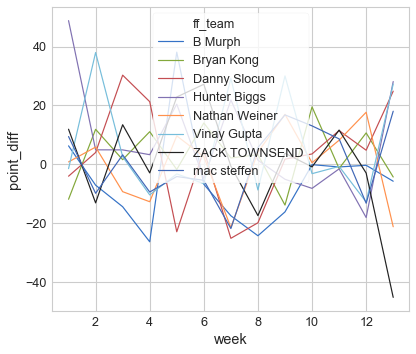

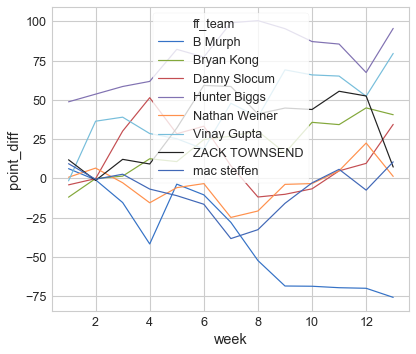

In [40]:
performance_data = player_data[['point_diff', 'current_slot', 'ff_team','name', 'week']]
performance_data = performance_data[performance_data.current_slot == "BE"]
performance_sum = performance_data.groupby(['ff_team', 'week']).sum().reset_index()
performance_cumsum = performance_data.groupby(['ff_team', 'week']).sum().groupby("ff_team").cumsum().reset_index()

sns.lineplot(data=performance_sum, x="week", y="point_diff", hue="ff_team")
plt.show()
sns.lineplot(data=performance_cumsum, x="week", y="point_diff", hue="ff_team")
plt.show()

# Get Team Info

In [41]:
import numpy as np

In [42]:
team_data = l19.manager_get_team_data()

Loading 13 weeks of data
Loading Week 1 2 3 4 5 6 7 8 9 10 11 12 13 



# Points For

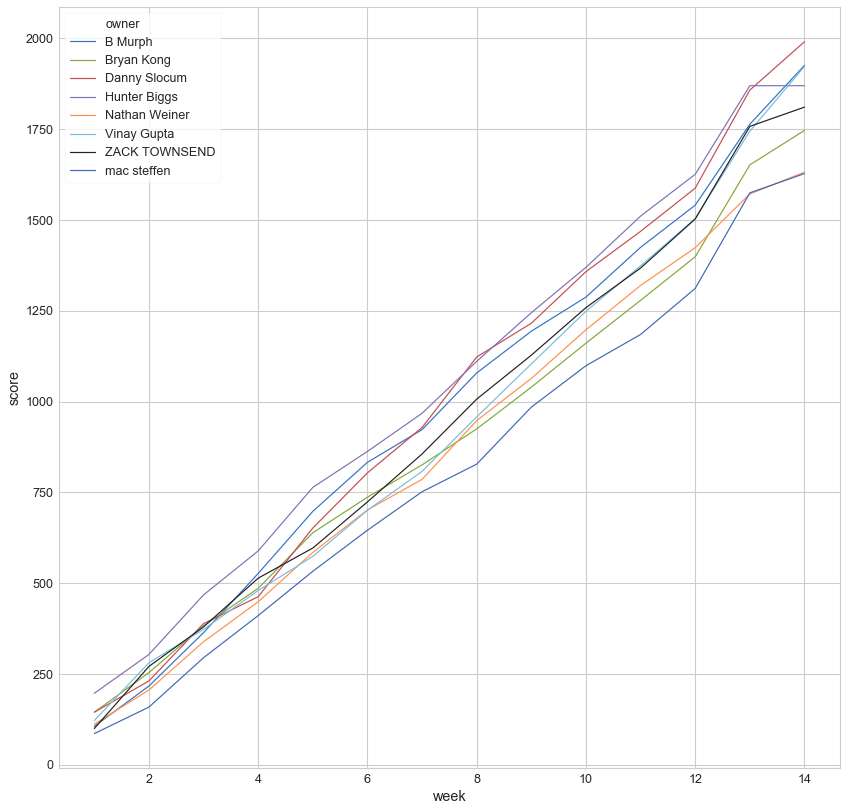

In [43]:
pf = team_data[['owner', 'scores_for']]
pf = pf.scores_for.apply(pd.Series).merge(pf, right_index = True, left_index = True).drop(["scores_for"], axis = 1).melt(id_vars = ['owner'], value_name = "score").dropna().drop_duplicates()
pf.columns = ['owner','week', 'score']
pf.week += 1
pf_cumsum = pf.groupby(['owner','week']).sum().groupby("owner").cumsum().reset_index()
fig, ax = plt.subplots(figsize=(14, 14))
sns.lineplot(data=pf_cumsum, x="week", y="score", hue="owner")
plt.show()

# Points Against

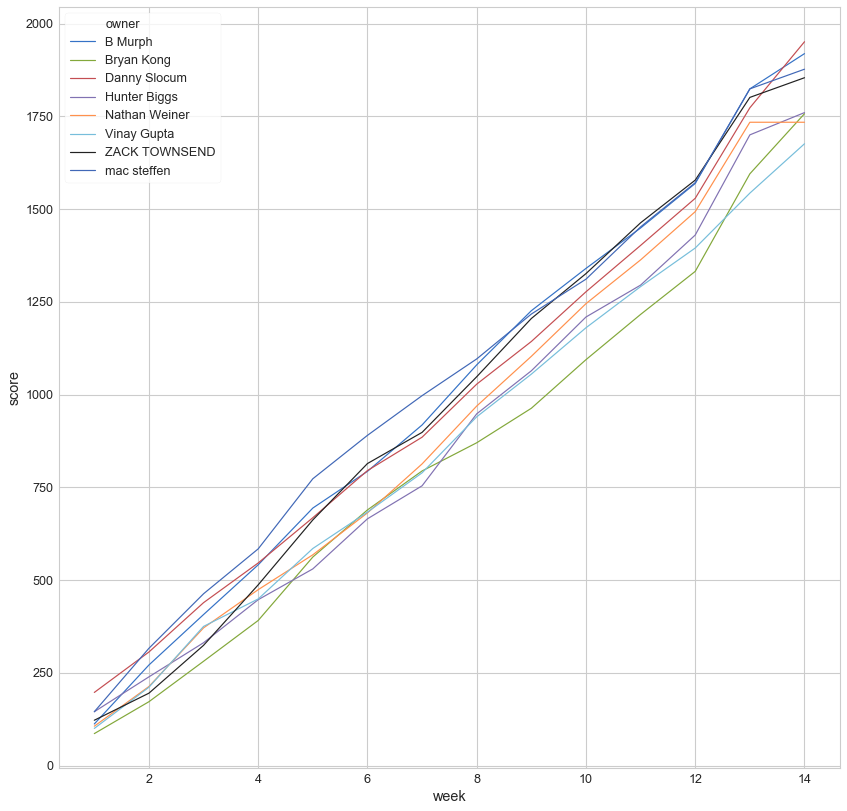

In [44]:
pf = team_data[['owner', 'scores_against']]
pf = pf.scores_against.apply(pd.Series).merge(pf, right_index = True, left_index = True).drop(["scores_against"], axis = 1).melt(id_vars = ['owner'], value_name = "score").dropna().drop_duplicates()
pf.columns = ['owner','week', 'score']
pf.week += 1
pf_cumsum = pf.groupby(['owner','week']).sum().groupby("owner").cumsum().reset_index()
fig, ax = plt.subplots(figsize=(14, 14))
sns.lineplot(data=pf_cumsum, x="week", y="score", hue="owner")
plt.show()

# Margin of Victory

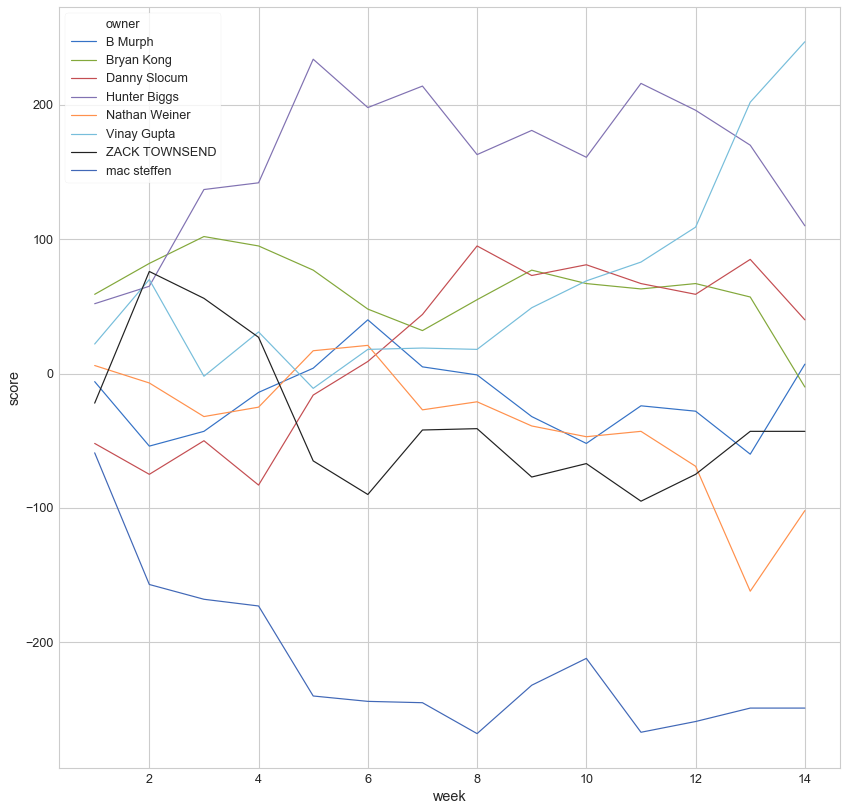

In [45]:
pf = team_data[['owner', 'mov']]
pf = pf.mov.apply(pd.Series).merge(pf, right_index = True, left_index = True).drop(["mov"], axis = 1).melt(id_vars = ['owner'], value_name = "score").dropna().drop_duplicates()
pf.columns = ['owner','week', 'score']
pf.week += 1
pf_cumsum = pf.groupby(['owner','week']).sum().groupby("owner").cumsum().reset_index()
fig, ax = plt.subplots(figsize=(14, 14))
sns.lineplot(data=pf_cumsum, x="week", y="score", hue="owner")
plt.show()

# Wins

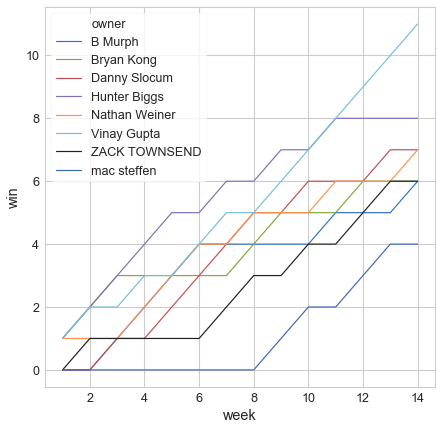

In [46]:
pf = team_data[['owner', 'mov']]
pf = pf.mov.apply(pd.Series).merge(pf, right_index = True, left_index = True).drop(["mov"], axis = 1).melt(id_vars = ['owner'], value_name = "score").dropna().drop_duplicates()
pf.columns = ['owner','week', 'score']
pf.week += 1
pf['win'] = 0
pf['win'][pf.score > 0] = 1
pf_cumsum = pf.groupby(['owner','week']).sum().groupby("owner").cumsum().reset_index()

fig, ax = plt.subplots(figsize=(7, 7))
sns.lineplot(data=pf_cumsum, x="week", y="win", hue="owner")
plt.show()

# Transactions

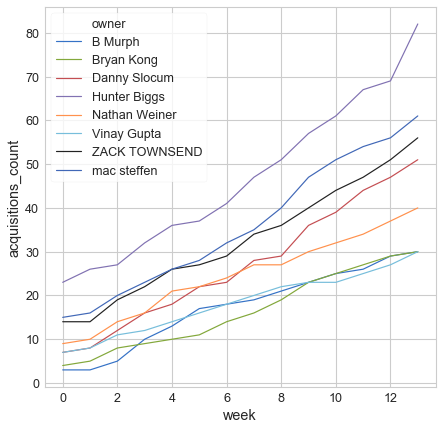

In [47]:
pf = team_data[['owner', 'week', 'acquisitions_count']]

group_acq = pf.groupby('owner').sum().reset_index()
total_acq = team_data[['owner', 'total_acquisitions']].drop_duplicates()
week0_data = []
for owner in total_acq.owner.unique():
    total = int(group_acq.acquisitions_count[group_acq.owner == owner])
    week0 = int(total_acq.total_acquisitions[total_acq.owner == owner]) - total
    df = {"owner": owner, "week": 0, "acquisitions_count": week0}
    week0_data.append(df)
week0_data = pd.DataFrame(week0_data) 
pf = pf.append(week0_data, ignore_index=True)
pf.sort_values(['owner','week'])
pf_cumsum = pf.groupby(['owner','week']).sum().groupby("owner").cumsum().reset_index()

fig, ax = plt.subplots(figsize=(7, 7))
sns.lineplot(data=pf_cumsum, x="week", y="acquisitions_count", hue="owner")
plt.show()

# Roster Adjustments

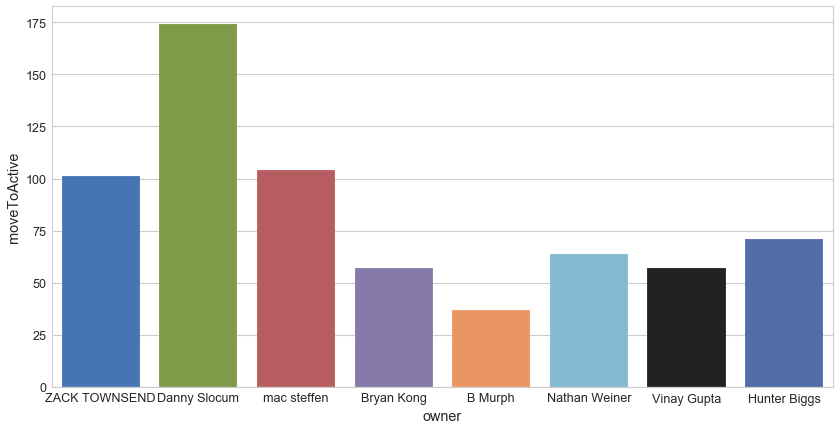

In [48]:
pf = team_data[['owner', 'moveToActive']].drop_duplicates()

fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(data=pf, x="owner", y="moveToActive")
plt.show()

# Power Rankings

In [49]:
pr = []
for week in range(1,l19.current_week):
    ranks = l19.power_rankings(week)
    [pr.append({"score": p[0], "team": p[1].owner, "week": week}) for p in ranks]
pr_pd = pd.DataFrame(pr)

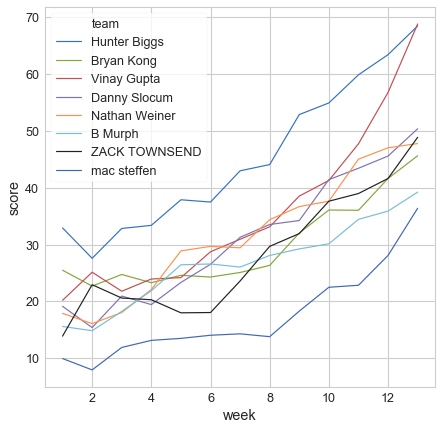

In [50]:
pr_pd = pr_pd.astype({'score': 'float'})
fig, ax = plt.subplots(figsize=(7, 7))
sns.lineplot(data=pr_pd, x="week", y="score", hue="team")
plt.show()

In [51]:
l19.least_scored_week()

(Team(Feelin' Lucky), 0.0)

In [52]:
l19.top_scored_week()

(Team(Leader of the Resistance), 270.0)

In [53]:
l19.most_points_against()

Team(Oh oh oh  Fitzmagic)

In [54]:
l19.least_scorer()

Team(Ride the  Red Rocket )

In [55]:
l19.top_scorer()

Team(Feelin' Lucky)

In [56]:
l19.standings()

[Team(Team Drop Out of Med School),
 Team(Feelin' Lucky),
 Team(Leader of the Resistance),
 Team(Thank You Bryan Kong),
 Team(This is the year),
 Team(I am Cooper Kupp),
 Team(Oh oh oh  Fitzmagic),
 Team(Ride the  Red Rocket )]

In [66]:
l19._get_positional_ratings(7)

{'1': {'ARI': {'average': 23.666666666666668, 'rank': 31},
  'ATL': {'average': 23.666666666666668, 'rank': 31},
  'BAL': {'average': 14.833333333333334, 'rank': 13},
  'BUF': {'average': 10.2, 'rank': 4},
  'CAR': {'average': 13.333333333333334, 'rank': 10},
  'CHI': {'average': 10.4, 'rank': 5},
  'CIN': {'average': 20.833333333333332, 'rank': 29},
  'CLE': {'average': 18.166666666666668, 'rank': 22},
  'DAL': {'average': 12.0, 'rank': 7},
  'DEN': {'average': 8.666666666666666, 'rank': 3},
  'DET': {'average': 17.4, 'rank': 18},
  'GB': {'average': 11.833333333333334, 'rank': 6},
  'HOU': {'average': 18.666666666666668, 'rank': 23},
  'IND': {'average': 17.6, 'rank': 19},
  'JAX': {'average': 16.833333333333332, 'rank': 17},
  'KC': {'average': 18.833333333333332, 'rank': 25},
  'LAC': {'average': 12.833333333333334, 'rank': 9},
  'LAR': {'average': 15.166666666666666, 'rank': 14},
  'MIA': {'average': 23.6, 'rank': 30},
  'MIN': {'average': 14.666666666666666, 'rank': 12},
  'NE': 

In [67]:
l19.current_week

7

In [68]:
import requests

In [85]:
week = 7
r = requests.get("https://fantasy.espn.com/apis/v3/games/ffl/seasons/2019/segments/0/leagues/577577?view=mPositionalRatingsStats&scoringPeriodId=" + str(week), cookies=l19.cookies)
r

<Response [200]>

In [86]:
r.json()['scoringPeriodId']

7

In [87]:
r.json()['positionAgainstOpponent']['positionalRatings']['1']['average']

15.36767578125

In [4]:
odds = l19._get_game_odds()

In [7]:
l19._get_nfl_schedule()

{1: (14, 1571590800000),
 2: (15, 1571590800000),
 3: (18, 1571603100000),
 4: (30, 1571590800000),
 6: (21, 1571617200000),
 7: (12, 1571358000000),
 8: (16, 1571590800000),
 9: (13, 1571590800000),
 10: (24, 1571601900000),
 11: (34, 1571590800000),
 12: (7, 1571358000000),
 13: (9, 1571590800000),
 14: (1, 1571590800000),
 15: (2, 1571590800000),
 16: (8, 1571590800000),
 17: (20, 1571703300000),
 18: (3, 1571603100000),
 19: (22, 1571590800000),
 20: (17, 1571703300000),
 21: (6, 1571617200000),
 22: (19, 1571590800000),
 24: (10, 1571601900000),
 25: (28, 1571590800000),
 26: (33, 1571603100000),
 28: (25, 1571590800000),
 30: (4, 1571590800000),
 33: (26, 1571603100000),
 34: (11, 1571590800000)}

# of Players Loaded: 

TypeError: unhashable type: 'list'